In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
warnings.simplefilter("ignore")

In [21]:
def labels():
  col_names = ['label']
  col_names.extend([str(x) for x in range(256)])
  return col_names

def main_dataf(input_data):
  data = []
  A, _ = input_data.shape
  for i in range(A):
    string = input_data.iloc[i]
    my_list = [float(x) for x in string[0].split()]
    data.append(my_list)
  df = pd.DataFrame(data, columns = labels())
  return df

def digit_symmetry(df):
    pixels = df.iloc[:, 1:].values
    n = pixels.shape[1]
    cms_symmetry = np.sum(np.abs(pixels - np.flip(pixels, axis=1)), axis=1) / n
    df['x2'] = cms_symmetry
    return df

def digit_intensity(df):
    pixels = df.iloc[:, 1:].values
    avg_intensity = np.mean(np.abs(pixels), axis=1)
    df['x1'] = avg_intensity
    return df

def digits_data_processed(file_path):
  digit_train_data = pd.read_csv(file_path)
  digit_training_data = main_dataf(digit_train_data)
  digit_training_data['label'] = digit_training_data['label'].apply(lambda x: -1.0 if x != 1.0 else x)
  return digit_training_data

def processor(file_path):
  binary_filtered_digit_training_data = digits_data_processed(file_path)
  binary_filtered_digit_training_data = binary_filtered_digit_training_data.rename(columns={'label': 'y'})
  binary_filtered_digit_training_data = digit_intensity(binary_filtered_digit_training_data)
  binary_filtered_digit_training_data = digit_symmetry(binary_filtered_digit_training_data)
  training_data = binary_filtered_digit_training_data[['x1', 'x2', 'y']]
  positive_training_data = training_data[training_data['y'] == 1.0]
  negative_training_data = training_data[training_data['y'] == -1.0]
  return training_data


In [40]:
class Main_4:
  def __init__(self):
    self.kernels = ['linear', 'poly', 'rbf']
    self.C = [0.01, 0.1, 1, 10, 100, 1000]
    self.cv_size = 5

  def __init__(self, training_data=None, testing_data=None):
    self.kernels = ['linear', 'poly', 'rbf']
    self.C = [0.01, 0.1, 1, 10, 100, 1000]
    self.cv_size = 5

    if training_data is not None:
      self.X_train = training_data[['x1', 'x2']]
      self.Y_train = training_data[['y']]

    if testing_data is not None:
      self.X_test = testing_data[['x1', 'x2']]
      self.Y_test = testing_data[['y']]
training_data = processor('/content/ZipDigits.train')
testing_data = processor('/content/ZipDigits.test')
main_100 = Main_4(training_data, testing_data)

## Task-1

In [37]:
class Main_2(Main_4):
  def __init__(self, df):
    super().__init__()
    self.df = df
    self.X = df[['x1', 'x2']]
    self.Y = df[['y']]
    self.error = []

  def lp_1(self, C=1):
    for index, kernel in enumerate(self.kernels):
      ker_errors = []
      for C in self.C:
        svm = SVC(kernel=kernel, C=C)
        X_train = self.df[['x1', 'x2']]
        y_train = self.df[['y']]
        svm.fit(X_train, y_train)
        y_pred_train = svm.predict(X_train)
        training_error = 1 - accuracy_score(y_train, y_pred_train)
        ker_errors.append(training_error)
      self.error.append(ker_errors)
    C_1_spot = self.C.index(1)
    for index, kernel in enumerate(self.kernels):
      print(f"Training error with {kernel} kernel and C={1}: {self.error[index][C_1_spot]:.4f}")
Train_errors_diff_ker = Main_2(training_data)

### LP-1

In [27]:
Train_errors_diff_ker.lp_1()

Training error with linear kernel and C=1: 0.0240
Training error with poly kernel and C=1: 0.0121
Training error with rbf kernel and C=1: 0.0137


In [28]:
Train_errors_diff_ker.error

[[0.13786008230452673,
  0.03827160493827164,
  0.02400548696844995,
  0.013854595336076803,
  0.012071330589849105,
  0.011522633744855959],
 [0.01275720164609051,
  0.012071330589849105,
  0.012071330589849105,
  0.012345679012345734,
  0.012208504801097364,
  0.012208504801097364],
 [0.03566529492455417,
  0.020850480109739333,
  0.013717421124828544,
  0.011659807956104218,
  0.0113854595336077,
  0.011659807956104218]]

## HP-1

####  What is the best kernel for this dataset only based on the results above? Is this an appropriate way to select a model? Why or why not? Be brief in your answer </font>

Based on my findings, it appears that the polynomial (poly) kernel outperforms the other investigated kernels when it comes to classifying '1' in relation to other digits in the digits dataset. Out of the three examined kernels, it exhibits the best accuracy at 98.50% and the lowest training error at 1.50%.

It may not always be the best course of action, though, to choose the best kernel just on the basis of which of these outcomes has the highest accuracy or the lowest training error.

Due to the subsequent reasons:

**The OverFitting Problem** : The training set's high accuracy or low training error rates may not adequately generalize to new data (test set or real-world data). We are aware that on fresh, untested samples, a model that overfits the training set may perform poorly.

**Dataset Sensitivity**: Depending on the features and attributes of the dataset, the model's performance may differ noticeably. Although the poly Kernal nearly predicted 100% correctly in our current scenario, we cannot guarantee that it will work the same way with unseen data.

**Hyperparameter Tuning**: The selection of hyperparameters such as C, degree (for the polynomial kernel), or gamma (for the RBF kernel) can have a significant impact on the performance of SVMs, especially when using different kernels. For certain datasets, the default options may not always be the best choice.

**Cross-Validation**: Cross-validation methods, such as k-fold cross-validation, should be applied to provide a more accurate and transparent evaluation of model performance and kernel suitability.










#Task-2

In [34]:
class Main_3(Main_4):
  def __init__(self, df):
    super().__init__()
    self.df = df
    self.X = df[['x1', 'x2']]
    self.Y = df[['y']]
    self.error = []

  def lp_1(self):
    X_train, X_val, y_train, y_val = train_test_split(self.X, self.Y, test_size=0.2, random_state=42)
    for kernel in self.kernels:
      ker_errors = []
      for C in self.C:
          svm = SVC(kernel=kernel, C=C)
          Outputs_derived = cross_val_score(svm, X_train, y_train, cv=self.cv_size)
          cross_val_error = 1 - np.mean(Outputs_derived)
          # C_1_spot = self.C.index(1)
          print(f"Cross-validation error with {kernel} kernel and C={C}: {cross_val_error:.4f}")
          ker_errors.append(cross_val_error)
      self.error.append(ker_errors)
cross_valid = Main_3(training_data)

##LP-1

In [35]:
cross_valid.lp_1()

Cross-validation error with linear kernel and C=0.01: 0.1370
Cross-validation error with linear kernel and C=0.1: 0.0420
Cross-validation error with linear kernel and C=1: 0.0283
Cross-validation error with linear kernel and C=10: 0.0156
Cross-validation error with linear kernel and C=100: 0.0132
Cross-validation error with linear kernel and C=1000: 0.0120
Cross-validation error with poly kernel and C=0.01: 0.0134
Cross-validation error with poly kernel and C=0.1: 0.0122
Cross-validation error with poly kernel and C=1: 0.0127
Cross-validation error with poly kernel and C=10: 0.0127
Cross-validation error with poly kernel and C=100: 0.0125
Cross-validation error with poly kernel and C=1000: 0.0125
Cross-validation error with rbf kernel and C=0.01: 0.0381
Cross-validation error with rbf kernel and C=0.1: 0.0245
Cross-validation error with rbf kernel and C=1: 0.0151
Cross-validation error with rbf kernel and C=10: 0.0129
Cross-validation error with rbf kernel and C=100: 0.0130
Cross-valid

In [33]:
cross_valid.error

[[0.1370027088560336,
  0.04201005054669493,
  0.02829086323290153,
  0.01560274618915547,
  0.013202255861226697,
  0.012002304658850216],
 [0.013373929428641573,
  0.01217368426467702,
  0.01268826402453982,
  0.012688117043745839,
  0.012516737437918812,
  0.012516737437919034],
 [0.03806493905441377,
  0.024518454173593107,
  0.015088460390880742,
  0.012859496649572755,
  0.013030435313017619,
  0.012859202687984905]]

## LP-2

[[0.1370027088560336, 0.04201005054669493, 0.02829086323290153, 0.01560274618915547, 0.013202255861226697, 0.012002304658850216], [0.013373929428641573, 0.01217368426467702, 0.01268826402453982, 0.012688117043745839, 0.012516737437918812, 0.012516737437919034], [0.03806493905441377, 0.024518454173593107, 0.015088460390880742, 0.012859496649572755, 0.013030435313017619, 0.012859202687984905]]


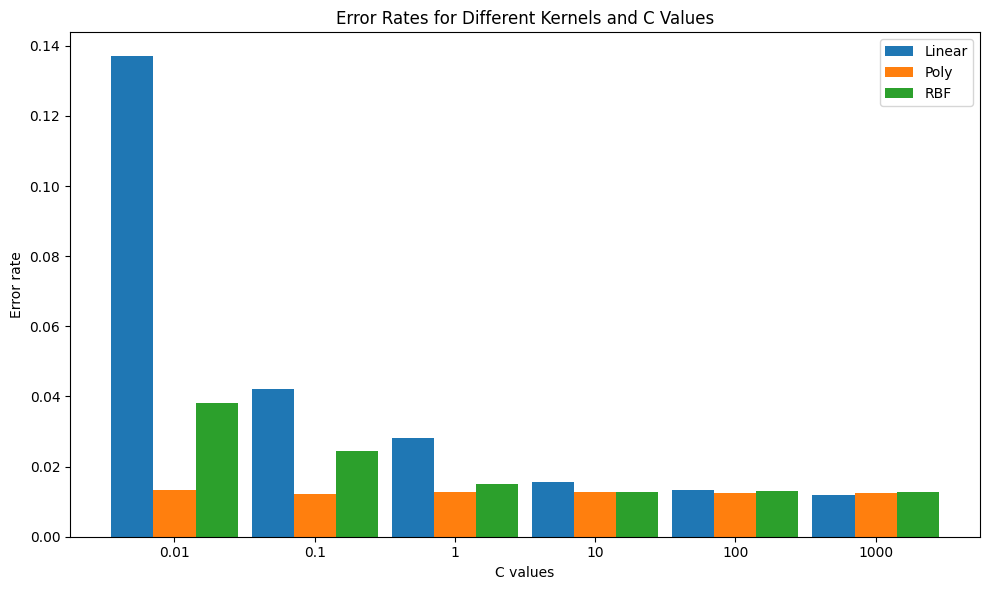

In [41]:
bar_width = 0.30
index = range(len(main_100.C))
plt.figure(figsize=(10, 6))
print(cross_valid.error)
plt.bar(index, cross_valid.error[0], width=bar_width, label='Linear')
plt.bar([i + bar_width for i in index], cross_valid.error[1], width=bar_width, label='Poly')
plt.bar([i + 2 * bar_width for i in index], cross_valid.error[2], width=bar_width, label='RBF')
plt.xlabel('C values')
plt.ylabel('Error rate')
plt.title('Error Rates for Different Kernels and C Values')
plt.xticks([i + bar_width for i in index], main_100.C)
plt.legend()
plt.tight_layout()
plt.show()

### Observations:

- Even if the third order polynomial is operating at peak efficiency, my modifications to the regularization parameter C have no effect on its performance. Third-order polynomial SVM classifier appears to be independent of regulation parameter.

- As the regularization parameter rises in magnitude, the SVM classifiers with linear kernels and rbf get better.

Hence, for an SVM classifier, I would select a kernel that allows for improved and modified predictions in response to changes in the regularization parameter.

Thus, in this instance, I would pick RBF Kernal.

Additionally, we must select a regularization parameter value that strikes a compromise between accuracy and overfitting.

Thus, I would select 10 as the C for this.

-  For the svm classfier with rbf kernl with C=10 I'm getting accuracy 1-0.012859496649572755 = 0.9871405033504272




# Task-3

## LP-1

Final SVM:
  - Kernal : rbf
  - C : 10

In [45]:
svm = SVC(kernel='rbf', C=10)
svm.fit(main_100.X_train, main_100.Y_train)
y_pred_train = svm.predict(main_100.X_train)
training_error = 1 - accuracy_score(main_100.Y_train, y_pred_train)
print(f"In-sample error for the SVM model with rbf kernel and C=10 percentage is {training_error*100:.2f}")

In-sample error for the SVM model with rbf kernel and C=10 percentage is 1.17


## LP-2






In [46]:
y_pred_train = svm.predict(main_100.X_test)
test_error = 1 - accuracy_score(main_100.Y_test, y_pred_train)
print(f"Final test error for the SVM model with rbf kernel and C=10 percentage is {test_error*100:.2f}")

Final test error for the SVM model with rbf kernel and C=10 percentage is 1.60


# Task-4

## HP-1

In [16]:
models = ["PLA", "pocket", "O(x^3) pocket", "NN-SGD", "NN-MBGD", "NN-BGD"]
accuracy = [63.42, 66.94, 95.32, 96.69, 98.71, 99.06]
test_errors = [100-x for x in accuracy]
test_errors

[36.58,
 33.06,
 4.680000000000007,
 3.3100000000000023,
 1.2900000000000063,
 0.9399999999999977]

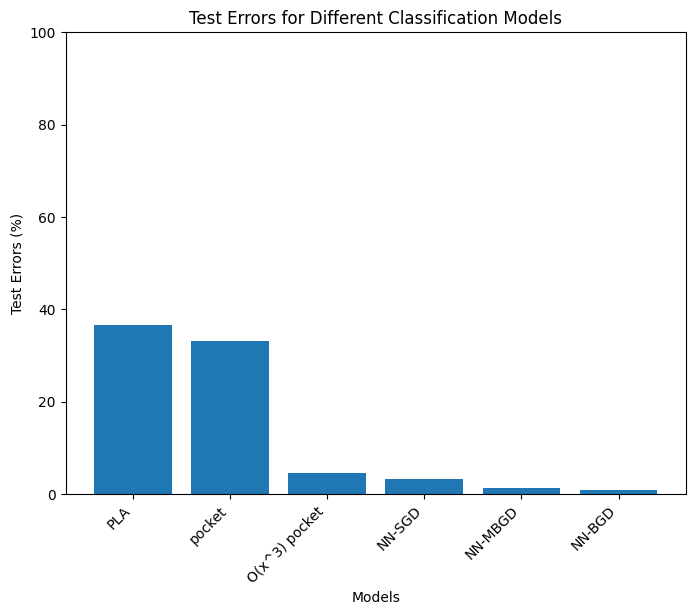

In [53]:
plt.figure(figsize=(8, 6))
plt.bar(models, test_errors)
plt.xlabel('Models')
plt.ylabel('Test Errors (%)')
plt.title('Test Errors for Different Classification Models')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.show()

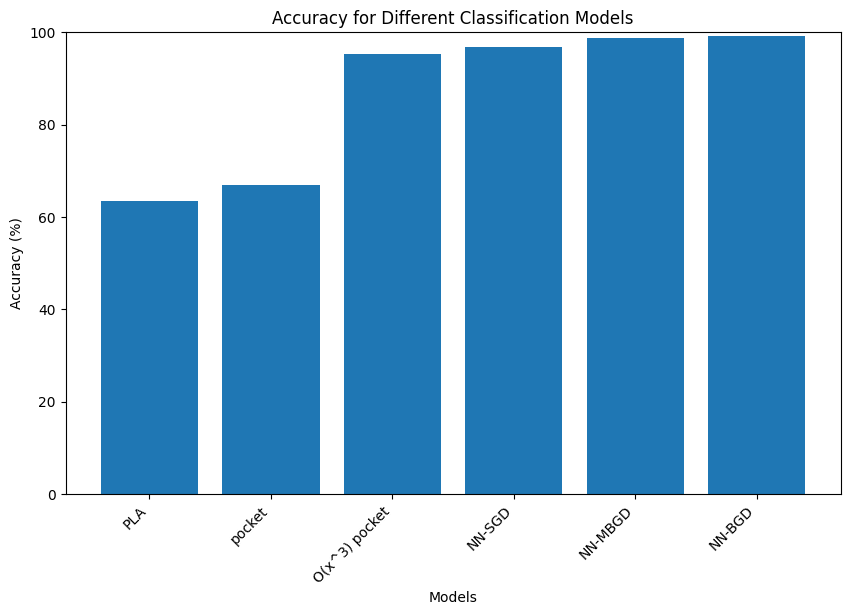

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Different Classification Models')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.show()

**Best Test Error**: With a test error of 0.94%, the NN-BGD model has the lowest test error.


**largest Test Error**: At 36.58%, the PLA model has the largest test error.



The models' performance is being influenced by numerous elements.

- Since Pocket and PLA are extremely basic models that only take into account linear relationships and include two features, increasing the features to eight through the construction of a third-order polynomial resulted in a 33% improvement in performance.



- The polynomial feature transformation (O(x^3) pocket) may have enhanced the model's performance in comparison to the pocket and PLA technique by better capturing nonlinear relationships in the data.







- As the models conplexity increases the more better the predictions, for example the neural networks (NN-SGD, NN-MBGD, NN-BGD) might have learned more intricate patterns in the data, leading to lower errors compared to simpler models like PLA.

## HP-2

In [58]:
testing_data.shape

(2006, 3)

In [59]:
training_data.shape

(7290, 3)

Indeed, this is the proper method for determining the appropriate digit classification model. Given the range of models employed and the quantity of the dataset—roughly 3700 samples for training and 2000 samples for testing—the strategy involved making numerous optimization changes in order to identify the best classification model.


A few of the tasks we did over the course to determine which classification model was superior are listed below.
Cross-checking: We utilized cross-validation to fit a pocket with third-order transformed data. We discovered that this strategy helps minimize overfitting, so we applied it elsewhere as well.



Hyperparameter tuning: For neural networks, we experimented with various learning rates, regularization strengths, and epoch counts. Investigate various polynomial orders for non-linear models, such as polynomial regression, in order to strike a compromise between model complexity and performance.

Model Complexity vs. Dataset amount: By weighing the models' complexity in relation to the amount of the dataset. It is necessary to weigh the trade-off between model complexity and dataset size because more complicated models have the potential to overfit smaller datasets.

The few tweaks we did to enhance each model's performance are listed below.

The Pocket Algorithm and Perceptron (PLA) are: - Accuracy is somewhat increased by increasing the number of weight updates, although it may eventually plateau.- -  Trying with higher-order polynomials facilitates the capture of intricate correlations. The importance of non-linear correlations in the data is demonstrated by the performance increase obtained by converting the data into a third order polynomial.

Using neural networks (SGD, MBGD, and BGD), the learning rate was modified to account for convergence speed and prevent overshooting. This was probably changed throughout the process of testing with various gradient descent strategies.
- Experimenting with various batch sizes for MBGD helped strike a compromise between convergence speed and computing efficiency.
Experimented with various weight initialization techniques to influence convergence rate and prevent local minima.

In summary, we experimented with various methods like as increasing iterations, epochs, changing learning, or adjusting hyperparameters to improve each model's performance in an orderly manner. Therefore, our strategy is a perfect way to tackle this specific issue.
